In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

model_name = ["cnn_dataset_300000_8_cv_dct", "fc_dataset_300000_8_cv_dct", "fc_cnn_dataset_300000_8_cv_dct", "decnn_dataset_300000_8_cv_dct"]
gray = cv2.imread(f"./output/gray.png")
patch_size = 8
plt.style.use('dark_background')
# 255 169

In [2]:
# for name in model_name:
#     recon = cv2.imread(f"./output/{name}.png", 0)
#     cv2.imwrite(f"./output/{name}_diff.png", gray-recon)

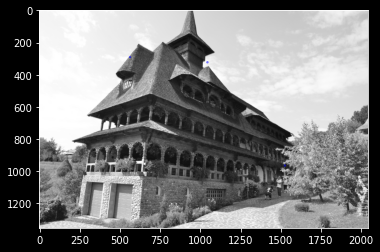

True

In [3]:
random_x = [patch_size*70, patch_size*130, patch_size*190]
random_y = [patch_size*36, patch_size*40, patch_size*120]
gray_crop = gray.copy()
for i in range(3):
    y, x = random_y[i], random_x[i]
    gray_crop = cv2.rectangle(gray_crop, (x, y), (x+8, y+8), (0, 0, 255), 2)

plt.imshow(gray_crop)
plt.show()
cv2.imwrite("./output/gray_crop.png", gray_crop)

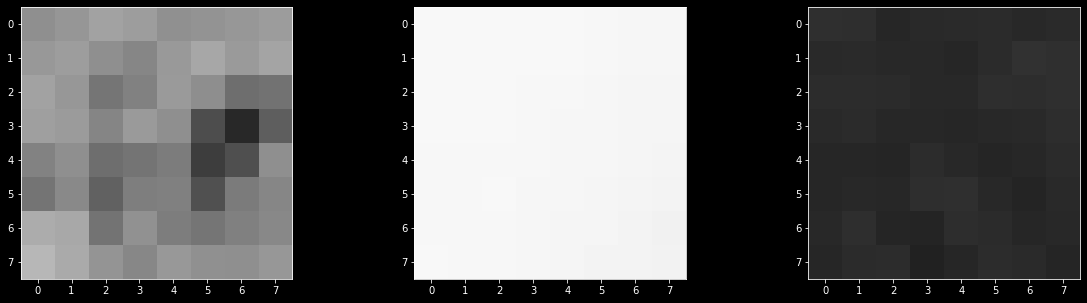

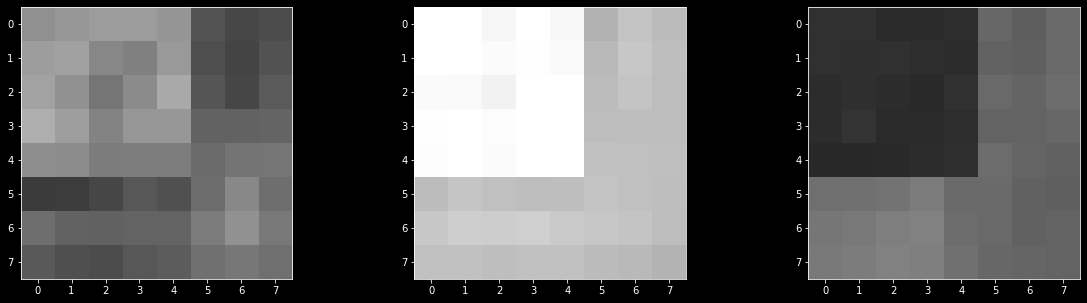

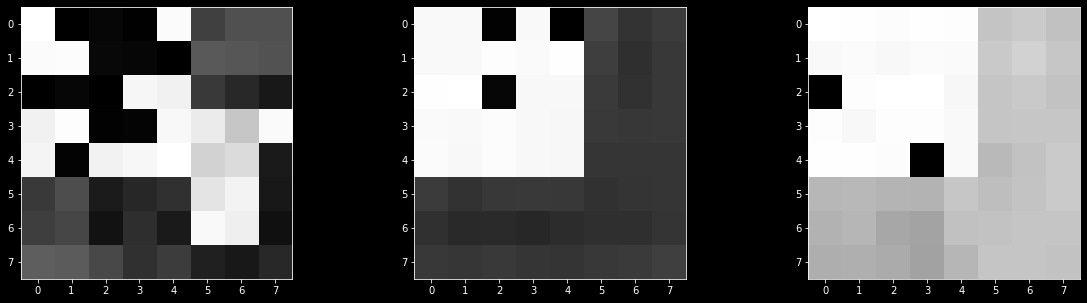

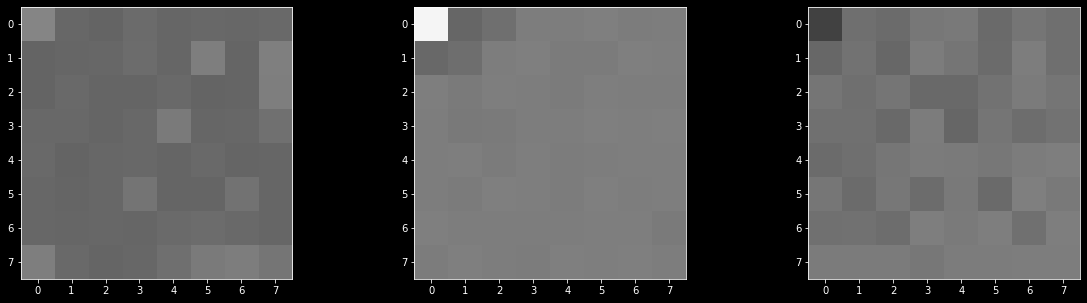

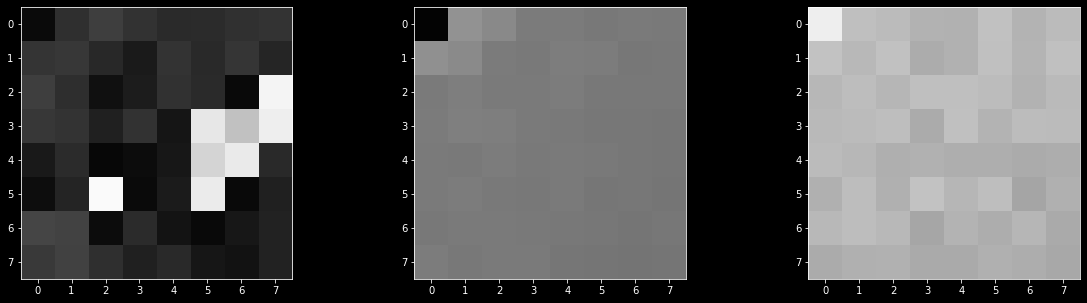

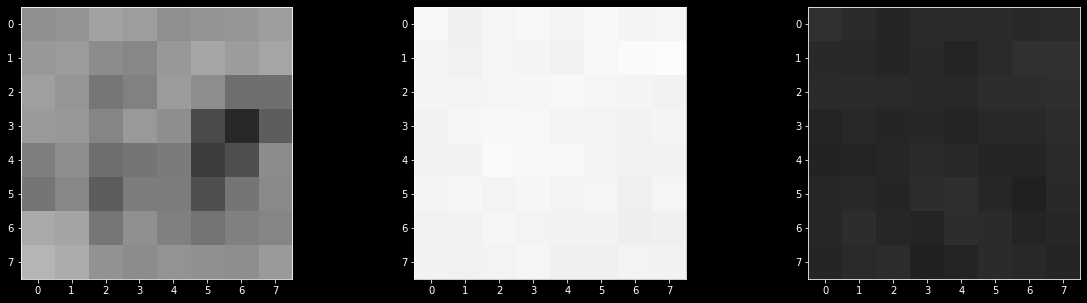

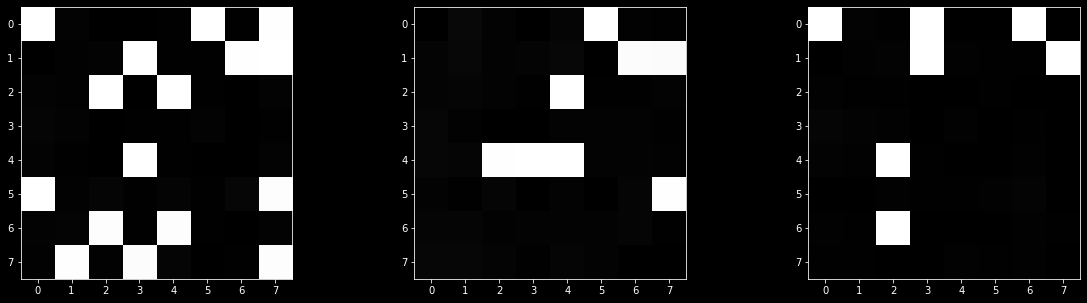

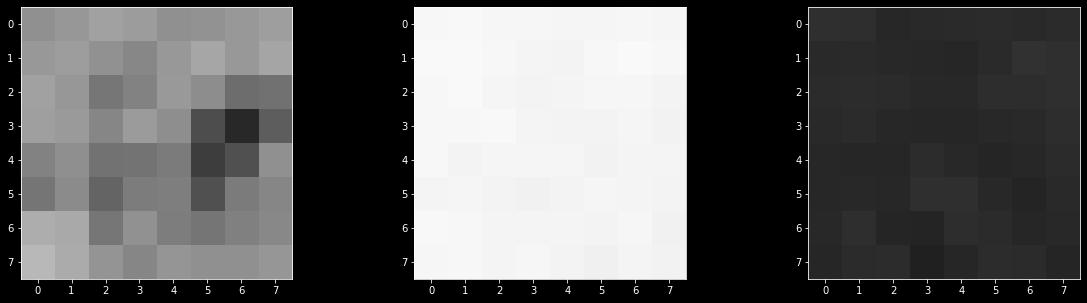

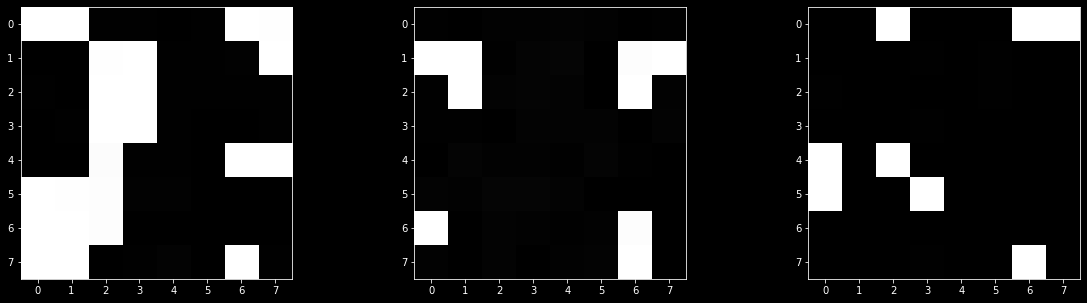

In [4]:

fig = plt.figure(figsize=(20, 5))
for i in range(3):
    y, x = random_y[i], random_x[i]
    plt_ = fig.add_subplot(131+i)
    plt_.imshow(gray[y:y+patch_size, x:x+patch_size], cmap="gray", vmin=0, vmax=255)
plt.savefig(f"./output/fig_gray_patch.png", bbox_inches="tight", transparent=True)
plt.show()
for name in model_name:
    recon = cv2.imread(f"./output/{name}.png")
    recon_crop = recon.copy()
    fig = plt.figure(figsize=(20, 5))
    for i in range(3):
        y, x = random_y[i], random_x[i]
        recon_crop = cv2.rectangle(recon_crop, (x, y), (x+8, y+8), (0, 0, 255), 2)
        plt_ = fig.add_subplot(131+i)
        plt_.imshow(recon[y:y+patch_size, x:x+patch_size], cmap="gray", vmin=0, vmax=255)
    plt.savefig(f"./output/fig_{name}.png", bbox_inches="tight", transparent=True)
    plt.show()
    fig = plt.figure(figsize=(20, 5))
    for i in range(3):
        y, x = random_y[i], random_x[i]
        #recon_crop = cv2.rectangle(recon_crop, (x, y), (x+8, y+8), (0, 0, 255), 2)
        plt_ = fig.add_subplot(131+i)
        plt_.imshow(gray[y:y+patch_size, x:x+patch_size]-recon[y:y+patch_size, x:x+patch_size], cmap="gray", vmin=0, vmax=255)
    plt.savefig(f"./output/fig_{name}_diff.png", bbox_inches="tight", transparent=True)
    plt.show()
    
    cv2.imwrite(f"./output/{name}_crop.png", recon_crop)

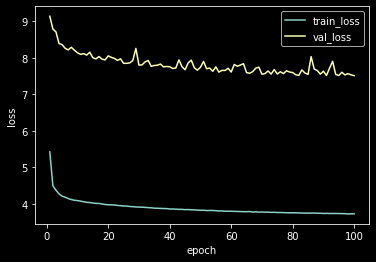

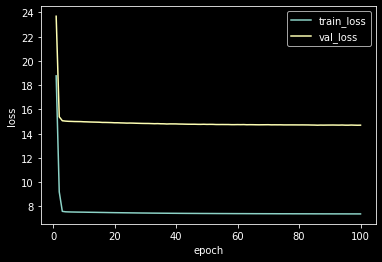

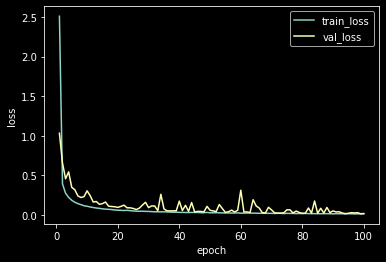

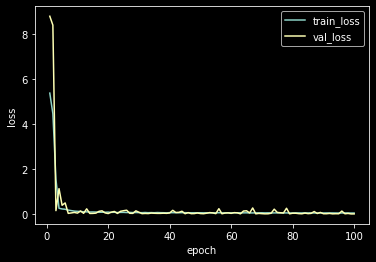

In [5]:
epoch = [i+1 for i in range(100)]
train_losses = []
val_losses = []
for name in model_name:
    with open(f"./loss_log/{name}.log") as log_file:
        train_loss = []
        val_loss = []
        for i, log in enumerate(log_file.readlines()):
            train_loss.append(float(log.split(",")[0]))
            val_loss.append(float(log.split(",")[1]))
        plt.plot(epoch, train_loss, label="train_loss")
        plt.plot(epoch, val_loss, label="val_loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        plt.savefig(f"./output/fig_loss_{name}.png", bbox_inches="tight", transparent=True)
        plt.show()
        val_losses.append(val_loss)
        train_losses.append(train_loss)

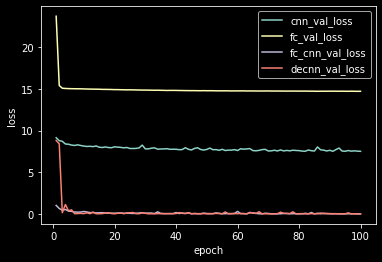

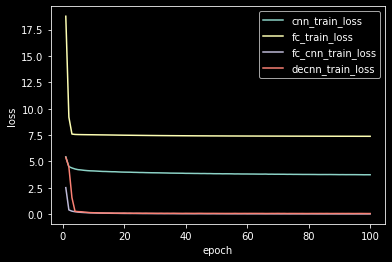

In [6]:
plt.plot(epoch, val_losses[0], label="cnn_val_loss")
plt.plot(epoch, val_losses[1], label="fc_val_loss")
plt.plot(epoch, val_losses[2], label="fc_cnn_val_loss")
plt.plot(epoch, val_losses[3], label="decnn_val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig(f"./output/fig_all_val_loss.png", bbox_inches="tight", transparent=True)
plt.show()

plt.plot(epoch, train_losses[0], label="cnn_train_loss")
plt.plot(epoch, train_losses[1], label="fc_train_loss")
plt.plot(epoch, train_losses[2], label="fc_cnn_train_loss")
plt.plot(epoch, train_losses[3], label="decnn_train_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig(f"./output/fig_all_train_loss.png", bbox_inches="tight", transparent=True)
plt.show()

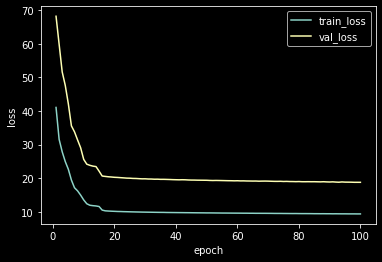

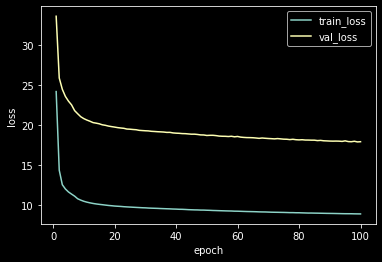

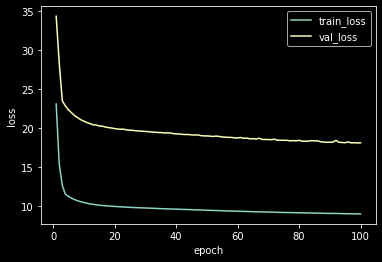

In [7]:
fc_name = ["1fc64_3cnn_dataset_100000_16_cv_dct", "2fc64_3cnn_dataset_100000_16_cv_dct", "3fc64_3cnn_dataset_100000_16_cv_dct"]
train_losses = []
val_losses = []
for name in fc_name:
    with open(f"./loss_log/{name}.log") as log_file:
        train_loss = []
        val_loss = []
        for i, log in enumerate(log_file.readlines()):
            train_loss.append(float(log.split(",")[0]))
            val_loss.append(float(log.split(",")[1]))
        plt.plot(epoch, train_loss, label="train_loss")
        plt.plot(epoch, val_loss, label="val_loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        plt.savefig(f"./output/fig_loss_{name}.png", bbox_inches="tight", transparent=True)
        plt.show()
        val_losses.append(val_loss)
        train_losses.append(train_loss)

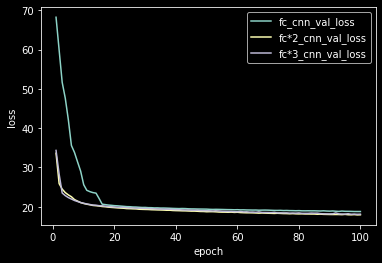

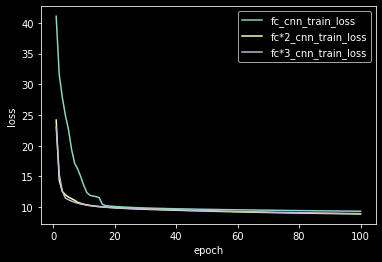

In [8]:
plt.plot(epoch, val_losses[0], label="fc_cnn_val_loss")
plt.plot(epoch, val_losses[1], label="fc*2_cnn_val_loss")
plt.plot(epoch, val_losses[2], label="fc*3_cnn_val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig(f"./output/fig_fc_cnn_val_loss.png", bbox_inches="tight", transparent=True)
plt.show()

plt.plot(epoch, train_losses[0], label="fc_cnn_train_loss")
plt.plot(epoch, train_losses[1], label="fc*2_cnn_train_loss")
plt.plot(epoch, train_losses[2], label="fc*3_cnn_train_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig(f"./output/fig_fc_cnn_train_loss.png", bbox_inches="tight", transparent=True)
plt.show()

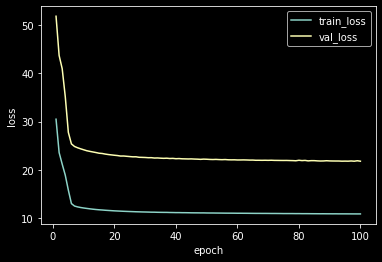

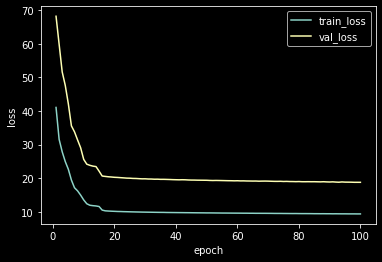

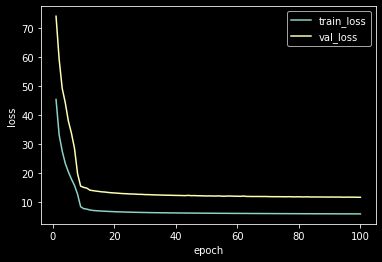

In [9]:
fc_name = ["1fc32_3cnn_dataset_100000_16_cv_dct", "1fc64_3cnn_dataset_100000_16_cv_dct", "1fc128_3cnn_dataset_100000_16_cv_dct"]
train_losses = []
val_losses = []
for name in fc_name:
    with open(f"./loss_log/{name}.log") as log_file:
        train_loss = []
        val_loss = []
        for i, log in enumerate(log_file.readlines()):
            train_loss.append(float(log.split(",")[0]))
            val_loss.append(float(log.split(",")[1]))
        plt.plot(epoch, train_loss, label="train_loss")
        plt.plot(epoch, val_loss, label="val_loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        plt.savefig(f"./output/fig_fc_wide_loss_{name}.png", bbox_inches="tight", transparent=True)
        plt.show()
        val_losses.append(val_loss)
        train_losses.append(train_loss)

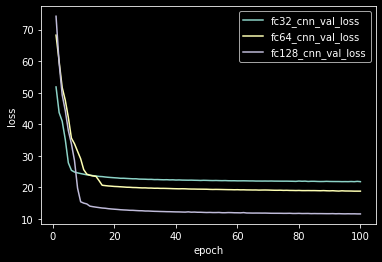

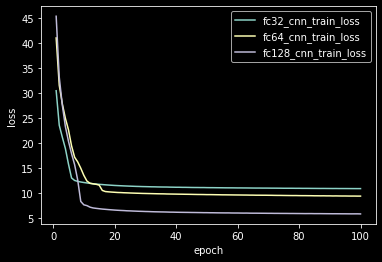

In [10]:
plt.plot(epoch, val_losses[0], label="fc32_cnn_val_loss")
plt.plot(epoch, val_losses[1], label="fc64_cnn_val_loss")
plt.plot(epoch, val_losses[2], label="fc128_cnn_val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig(f"./output/fig_fc_wide_cnn_val_loss.png", bbox_inches="tight", transparent=True)
plt.show()

plt.plot(epoch, train_losses[0], label="fc32_cnn_train_loss")
plt.plot(epoch, train_losses[1], label="fc64_cnn_train_loss")
plt.plot(epoch, train_losses[2], label="fc128_cnn_train_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig(f"./output/fig_fc_wide_cnn_train_loss.png", bbox_inches="tight", transparent=True)
plt.show()

In [11]:
leena = cv2.imread("./test_image/lenna.png")
leena_lr = cv2.resize(leena, (128, 128))
leena_sr = cv2.resize(leena_lr, (512, 512))
cv2.imwrite("leena_lr.png", leena_lr)
cv2.imwrite("leena_sr.png", leena_sr)

True